In [2]:
from error_prop import print_err_report
import numpy as np

In [3]:
import pint
ureg = pint.UnitRegistry()
Q_   = ureg.Quantity

In [4]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{siunitx}'
matplotlib.rc('text', usetex = True)

# Part A

In [2]:
data = {'V1': [1.57,0.01,'V'],
        'V2': [1.56,0.01,'V']
       }
# series
expr = 'V1+V2'
print_err_report(expr,data)

# reverse polarity
expr = 'V1-V2'
print_err_report(expr,data)

3.13 volt +- 0.01 volt
0.01 volt +- 0.01 volt


# Part C

In [3]:
listed   = np.array([47e0,5.8e0,2.2e0,68e-1,27e-1,68e1,18e1,12e1,47e0,68e0])
tol      = 0.05

measured = np.array([47.4,5.5,3.1,9.1,4.5,6.79e02,1.88e02,1.22e02,4.68e01,6.73e01])

print([1 if 0.95*lis < meas < 1.05*lis else 0 for lis,meas in zip(listed,measured)])

# good to measure the resistance
#     - the size of the tolerance varies at 5% between small and large resistors
#     - resistace can potentially vary with external conditions (temperature, etc.)

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [4]:
data = {'R1': [47.5,0.1,'ohm'],
        'R2': [75.4,0.1,'ohm']
       }
# series
expr = 'R1 + R2'
print_err_report(expr,data)

# parallel
expr = '1/(1/R1 + 1/R2)'
print_err_report(expr,data)

122.9 ohm +- 0.1 ohm
29.14 ohm +- 0.04 ohm


# Part D

In [5]:
data = {'V': [1.5,0.1,'V'],
        'R': [0.554,0.001,'kohm']
       }
expr = 'V/R'
print_err_report(expr,data,'mA')

2.7 milliampere +- 0.2 milliampere


# Part E

In [7]:
data = {'V': [1.5,0.1,'V'],
        'R': [55.0,0.1,'kohm']
       }
expr = 'V/R'
print_err_report(expr,data,'uA')

27.0 microampere +- 2.0 microampere


In [8]:
load   = Q_(np.array([100.0,200.0,300.0,400.0,500.0]),'ohm')
series = Q_(55.0,'kohm')

percents = (load/series).to('').magnitude*100

with np.printoptions(precision=2):
    print(percents)

[0.18 0.36 0.55 0.73 0.91]


In [30]:
data = {'V': [1.5,0.1,'V'],
        'Rl': [55.0,0.1,'kohm'],
        'RL': [np.array([100.0,200.0,300.0,400.0,500.0]),0.02*np.array([100.0,200.0,300.0,400.0,500.0]),'ohm']
       }
expr = 'V/(Rl+RL)'
print_err_report(expr,data,'uA')

27.0 microampere +- 2.0 microampere
27.0 microampere +- 2.0 microampere
27.0 microampere +- 2.0 microampere
27.0 microampere +- 2.0 microampere
27.0 microampere +- 2.0 microampere


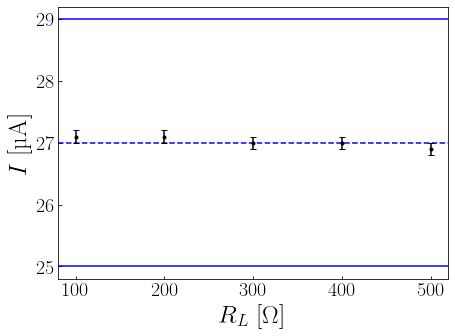

In [44]:
load    = Q_(np.array([100.0,200.0,300.0,400.0,500.0]),'ohm')
current = Q_(np.array([27.1,27.1,27,27,26.9]),'uA')
voltage = Q_(np.array([2.2,5.4,8.0,10.7,12.9]),'mV')

# current_from_voltage = Q_(1.5,'V')/(load+series)
current_from_voltage = current_from_voltage.to(current.units)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))

ax.axhline(y=27.0,ls='--',color='b')
ax.axhline(y=29.0,ls='-',color='b')
ax.axhline(y=25.0,ls='-',color='b')

ax.plot(load.magnitude,current.magnitude,'k.')
ax.errorbar(load.magnitude,current.magnitude,yerr=0.1,color='k',linestyle='None',capsize=3)

# ax.legend(loc='best',fontsize=20)
ax.set_xlabel(r'$R_L ~ [{:Lx}]$'.format(load.units),size=25)
ax.set_ylabel(r'$I ~ [{:Lx}]$'.format(current.units),size=25)
ax.tick_params(which='major',axis='both',direction='in',labelsize=20)

plt.show()
# fig.savefig('current_source.pdf',bbox_inches='tight')

# Part F

In [50]:
# no load - R1
data = {'Vi': [5.0,0.1,'V'],
        'V1': [3.411,0.001,'V']
       }
expr = 'V1/Vi'
print_err_report(expr,data)

# no load - R2
data = {'Vi': [5.0,0.1,'V'],
        'V2': [1.612,0.001,'V']
       }
expr = 'V2/Vi'
print_err_report(expr,data)

0.68 dimensionless +- 0.01 dimensionless
0.322 dimensionless +- 0.006 dimensionless


In [57]:
# expected - R1
data = {'R1': [5.60,0.01,'kohm'],
        'R2': [2.647,0.001,'kohm']
       }
expr = 'R1/(R1+R2)'
print_err_report(expr,data)

# expected - R2
data = {'R1': [5.60,0.01,'kohm'],
        'R2': [2.647,0.001,'kohm']
       }
expr = 'R2/(R1+R2)'
print_err_report(expr,data)

0.679 dimensionless +- 0.0004 dimensionless
0.321 dimensionless +- 0.0004 dimensionless


In [51]:
# with load - R1
data = {'Vi': [5.0,0.1,'V'],
        'V1': [1.221,0.001,'V']
       }
expr = 'V1/Vi'
print_err_report(expr,data)

# with load - R2
data = {'Vi': [5.0,0.1,'V'],
        'V2': [0.576,0.001,'V']
       }
expr = 'V2/Vi'
print_err_report(expr,data)

0.244 dimensionless +- 0.005 dimensionless
0.115 dimensionless +- 0.002 dimensionless


In [59]:
# expected - R1
data = {'R1': [5.60,0.01,'kohm'],
        'R2': [2.647,0.001,'kohm'],
        'RL': [1.0,0.1,'kohm']
       }
expr = 'R1*RL/((R1+RL)*R2 + R1*RL)'
print_err_report(expr,data)

# expected - R2
data = {'R1': [5.60,0.01,'kohm'],
        'R2': [2.647,0.001,'kohm'],
        'RL': [1.0,0.1,'kohm']
       }
expr = 'R2*RL/((R2+RL)*R1 + R2*RL)'
print_err_report(expr,data)

0.24 dimensionless +- 0.02 dimensionless
0.115 dimensionless +- 0.007 dimensionless
